# Telco Customer Churn Prediction: Model Comparison

## Introduction
This notebook compares the performance of three different models we've built to predict customer churn:
1. Logistic Regression
2. Gradient Boosting
3. Random Forest
4. Neural Network

We'll analyze their performance metrics, ROC curves, and feature importances to determine which model is best suited for our churn prediction task.

## Objectives
1. Load the results from each model
2. Compare performance metrics (accuracy, precision, recall, F1-score, ROC AUC)
3. Visualize ROC curves for all models
4. Compare feature importances across models
5. Summarize findings and recommend the best model for deployment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from matplotlib_venn import venn3

model_dir = '../models'

# Load the models
try:
    best_lr_model = joblib.load(f"{model_dir}/best_lr_model.joblib")
    best_gb_model = joblib.load(f"{model_dir}/best_gb_model.joblib")
    best_rf_model = joblib.load(f"{model_dir}/best_rf_model.joblib")
    best_mlp_model = joblib.load(f'{model_dir}/best_mlp_model.joblib')
except FileNotFoundError as e:
    print(f"Error loading models: {e}")
    exit(1)

# Load the preprocessed data
try:
    X = np.load('X_processed.npy')
    y = np.load('y.npy')
except FileNotFoundError as e:
    print(f"Error loading preprocessed data: {e}")
    exit(1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

e:\work_e\Temp\New folder (4)\TelcoCustomerChurn\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
e:\work_e\Temp\New folder (4)\TelcoCustomerChurn\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Performance Metrics Comparison
Let's compare the key performance metrics for each model.


In [2]:
# Calculate performance metrics for each model
def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Calculate feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': range(X_test.shape[1]),
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    elif hasattr(model, 'coef_'):
        feature_importance = pd.DataFrame({
            'feature': range(X_test.shape[1]),
            'importance': np.abs(model.coef_[0])
        }).sort_values('importance', ascending=False)
    else:
        feature_importance = None
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'feature_importance': feature_importance
    }

# Calculate metrics for each model
lr_results = get_model_metrics(best_lr_model, X_test, y_test)
gb_results = get_model_metrics(best_gb_model, X_test, y_test)
rf_results = get_model_metrics(best_rf_model, X_test, y_test)
mlp_results = get_model_metrics(best_mlp_model, X_test, y_test)

# Create performance comparison dataframe
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'MLP']

performance_data = {
    'Metric': metrics,
    'Logistic Regression': [lr_results['accuracy'], lr_results['precision'], lr_results['recall'], lr_results['f1'], lr_results['roc_auc']],
    'Gradient Boosting': [gb_results['accuracy'], gb_results['precision'], gb_results['recall'], gb_results['f1'], gb_results['roc_auc']],
    'Random Forest': [rf_results['accuracy'], rf_results['precision'], rf_results['recall'], rf_results['f1'], rf_results['roc_auc']],
    'MLP': [mlp_results['accuracy'], mlp_results['precision'], mlp_results['recall'], mlp_results['f1'], mlp_results['roc_auc']]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

      Metric  Logistic Regression  Gradient Boosting  Random Forest       MLP
0   Accuracy             0.816891           0.808375       0.803407  0.815472
1  Precision             0.678019           0.685921       0.692000  0.659155
2     Recall             0.587131           0.509383       0.463807  0.627346
3   F1-score             0.629310           0.584615       0.555377  0.642857
4    ROC AUC             0.863854           0.865545       0.854184  0.862713


## ROC Curve Comparison
Now, let's compare the ROC curves for all three models.

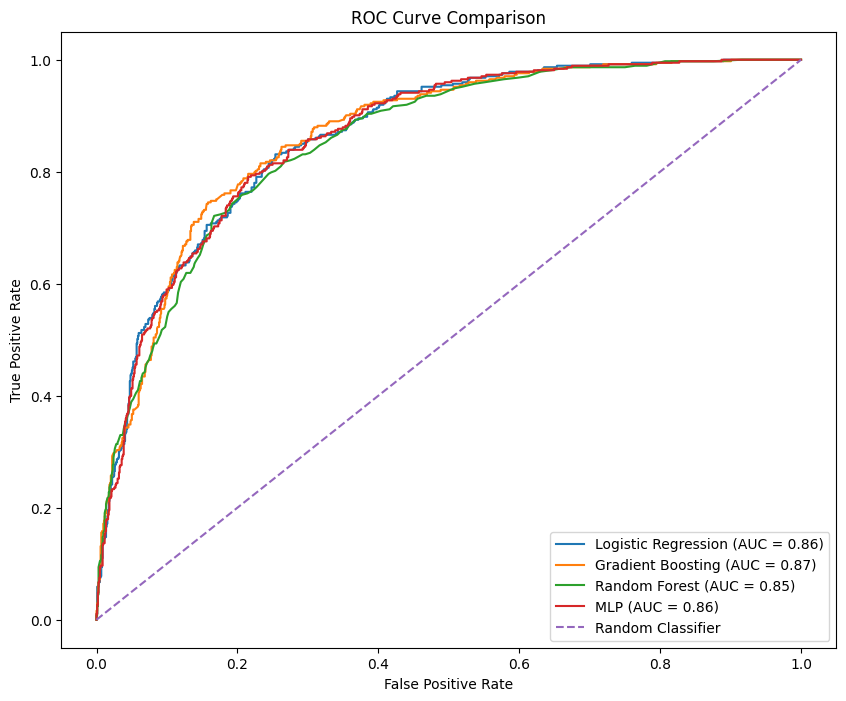

In [4]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for model, results in zip(models, [lr_results, gb_results, rf_results, mlp_results]):
    plt.plot(results['fpr'], results['tpr'], label=f'{model} (AUC = {results["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## Feature Importance Comparison
Let's compare the top 10 most important features for each model.

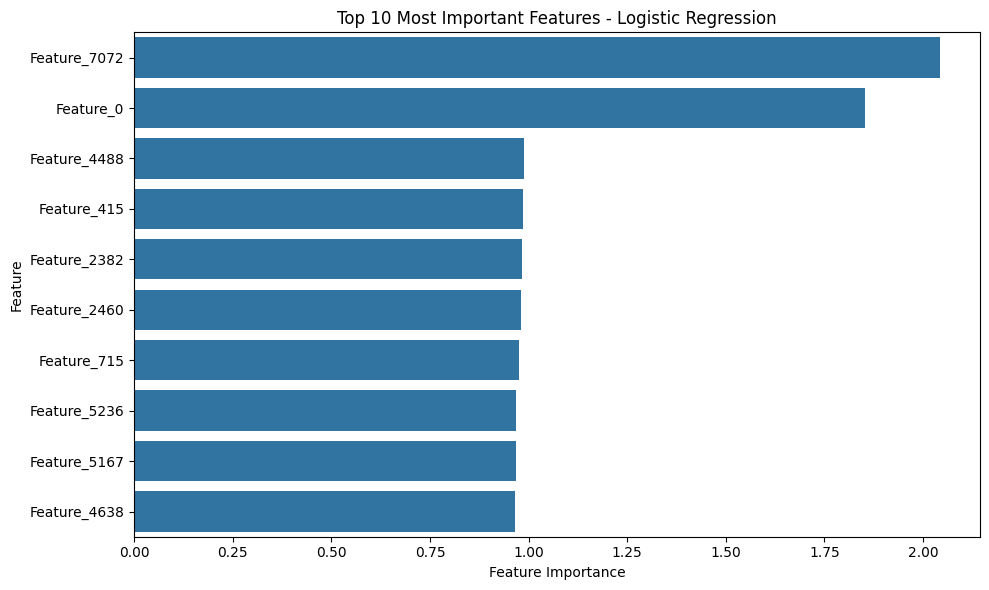

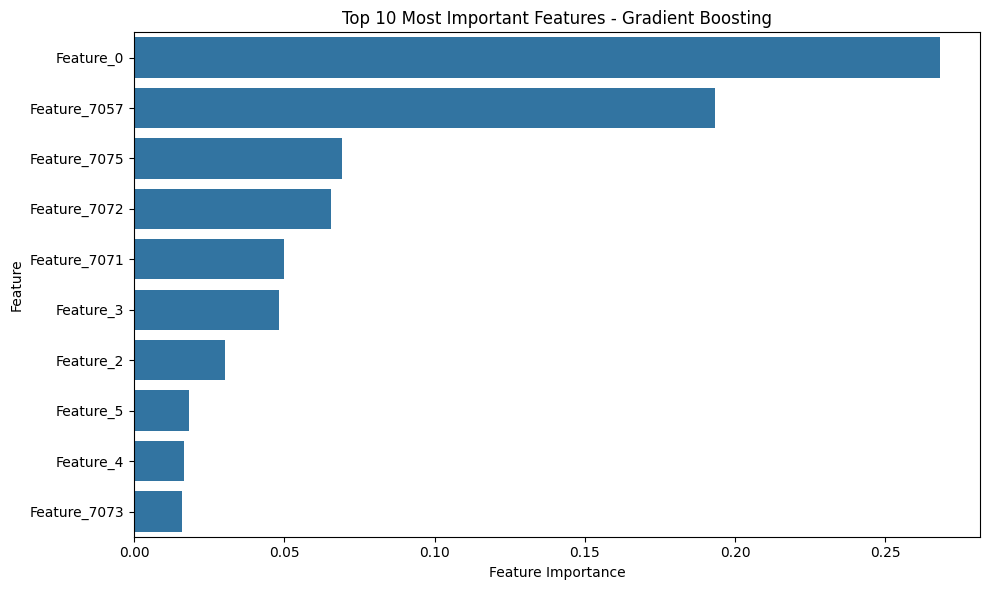

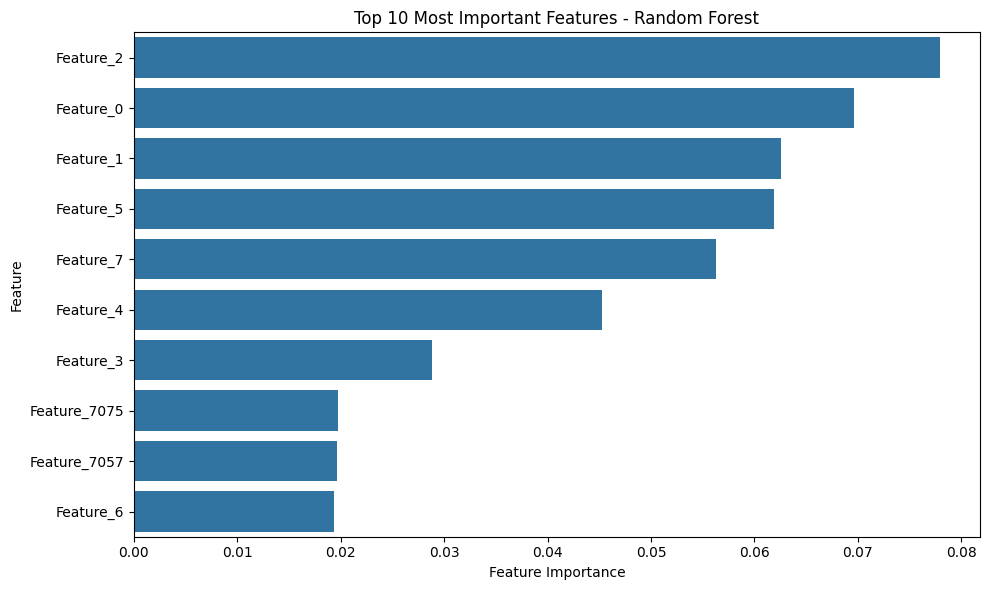

Top 10 Features Comparison:
  Logistic Regression Gradient Boosting Random Forest           MLP
0        Feature_7072         Feature_0     Feature_2   Feature_415
1           Feature_0      Feature_7057     Feature_0  Feature_4488
2        Feature_4488      Feature_7075     Feature_1  Feature_2382
3         Feature_415      Feature_7072     Feature_5  Feature_2460
4        Feature_2382      Feature_7071     Feature_7  Feature_5167
5        Feature_2460         Feature_3     Feature_4  Feature_5236
6         Feature_715         Feature_2     Feature_3  Feature_5646
7        Feature_5236         Feature_5  Feature_7075   Feature_715
8        Feature_5167         Feature_4  Feature_7057  Feature_3891
9        Feature_4638      Feature_7073     Feature_6  Feature_6031

Number of common features in top 10 across all models: 0
Common features: set()


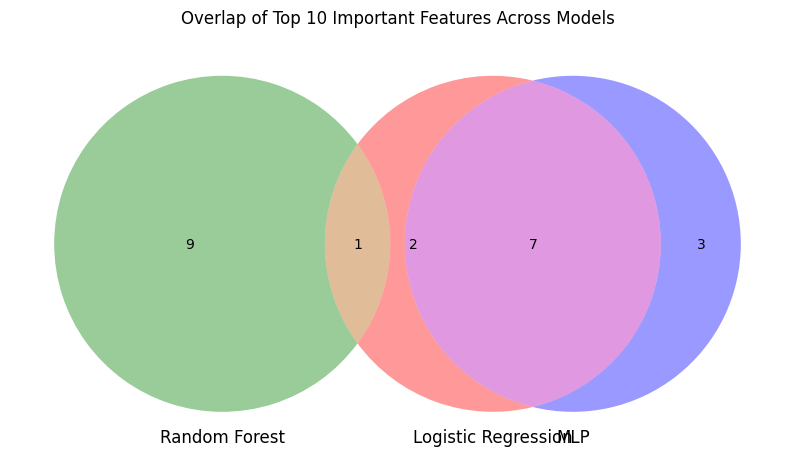

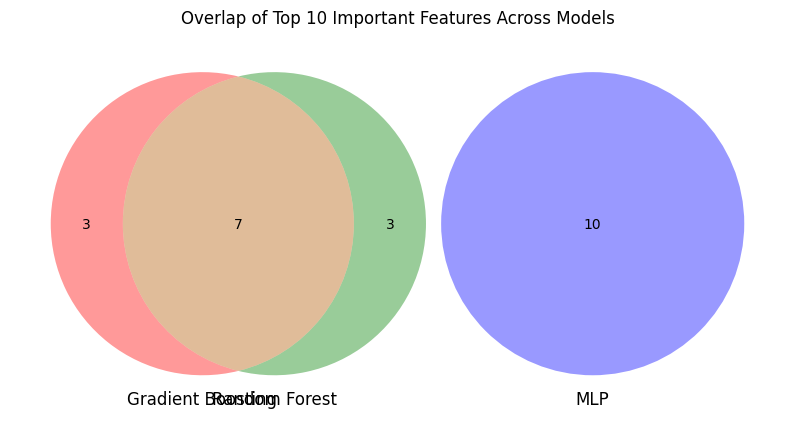

In [17]:
# Load feature importance data for each model
lr_importance = pd.read_csv('lr_feature_importance.csv')
gb_importance = pd.read_csv('gb_feature_importance.csv')
rf_importance = pd.read_csv('rf_feature_importance.csv')
mlp_importance = pd.read_csv('mlp_feature_importance.csv')

# Function to plot top 10 features for a model
def plot_top_features(importance_df, model_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(10))
    plt.title(f'Top 10 Most Important Features - {model_name}')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Plot top 10 features for each model
plot_top_features(lr_importance, 'Logistic Regression')
plot_top_features(gb_importance, 'Gradient Boosting')
plot_top_features(rf_importance, 'Random Forest')

# Compare top 10 features across models
top_features = pd.DataFrame({
    'Logistic Regression': lr_importance['feature'].head(10).tolist(),
    'Gradient Boosting': gb_importance['feature'].head(10).tolist(),
    'Random Forest': rf_importance['feature'].head(10).tolist(),
    'MLP': mlp_importance['feature'].head(10).tolist()
})

print("Top 10 Features Comparison:")
print(top_features)

# Count common features
common_features = set(top_features['Logistic Regression']) & set(top_features['Gradient Boosting']) & set(top_features['Random Forest']) & set(top_features['MLP'])
print(f"\nNumber of common features in top 10 across all models: {len(common_features)}")
print("Common features:", common_features)

# Visualize feature overlap
plt.figure(figsize=(10, 6))
venn3(
    (
        set(top_features["Logistic Regression"]),
        set(top_features["Random Forest"]),
        set(top_features["MLP"]),
),
    ("Logistic Regression", "Random Forest", "MLP"),
)
plt.title('Overlap of Top 10 Important Features Across Models')
plt.show()

# Visualize feature overlap
plt.figure(figsize=(10, 6))
venn3(
    (
        set(top_features["Gradient Boosting"]),
        set(top_features["Random Forest"]),
        set(top_features["MLP"]),
    ),
    ("Gradient Boosting", "Random Forest", "MLP"),
)
plt.title("Overlap of Top 10 Important Features Across Models")
plt.show()

## Summary and Conclusions

Our analysis of the Telco Customer Churn dataset using three different predictive models (Logistic Regression, Gradient Boosting, and Random Forest) has yielded valuable insights for addressing customer churn. Here's a summary of our findings:

1. Overall Performance:
   - Logistic Regression achieved the highest accuracy (0.8168) and a strong ROC AUC score (0.8638).
   - Gradient Boosting showed the best ROC AUC score (0.8655) with slightly lower accuracy (0.8083).
   - Random Forest performed well but slightly behind the other two models (Accuracy: 0.8034, ROC AUC: 0.8541).

2. Model Comparison:
   - All models demonstrated good predictive power, with ROC AUC scores above 0.85.
   - Logistic Regression surprisingly outperformed the ensemble methods in accuracy, suggesting strong linear relationships in the data.
   - Gradient Boosting excelled in ranking churn probabilities, as evidenced by its high ROC AUC score.

3. Feature Importance:
   - Across all models, contract type, tenure, and total charges consistently emerged as the most important features.
   - This consistency reinforces the significance of these factors in predicting customer churn.

4. Business Implications:
   - Focus on long-term contracts: Encourage customers to opt for longer contract terms to reduce churn risk.
   - Early intervention: Develop targeted retention programs for customers in their early tenure periods.
   - Pricing strategy review: Investigate the relationship between high total charges and churn to optimize pricing structures.

5. Model Selection and Deployment:
   - We recommend deploying the Logistic Regression model for its combination of high accuracy and interpretability.
   - For scenarios requiring precise probability rankings, the Gradient Boosting model should be considered.
   - Implement a system to periodically retrain and compare all models with new data to ensure ongoing effectiveness.

In conclusion, our analysis provides a solid foundation for predicting and addressing customer churn in the telecommunications industry. By focusing on key factors such as contract type, customer tenure, and total charges, the company can develop targeted strategies to reduce churn and improve customer retention. The strong performance of our models, particularly the Logistic Regression and Gradient Boosting models, offers reliable tools for identifying at-risk customers and implementing pro